In [1]:
# -*- coding: utf-8
# Abraji (https://www.abraji.org.br)
# Reinaldo Chaves (reinaldo@abraji.org.br)
# Acessa a API do Portal da Transparência para verificar despesas do Ministério da Ciência, Tecnologia, Inovações e Comunicações
#
# Programa do curso Técnicas de raspagem de dados e acesso a APIs
#

In [4]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
# Documentação em: http://www.transparencia.gov.br/swagger-ui.html#/
# Procurar em Despesas Públicas, por órgão

In [4]:
# Para saber qual foi a última atualização de dados: http://portaldatransparencia.gov.br/origem-dos-dados

In [6]:
# Muda o formato de apresentação de números float em dataframes do pandas

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
# Despesas Públicas - Consulta as despesas dos órgão do Poder Executivo Federal
# Código '24000' é o MCTIC no SIAFI (Sistema Integrado de Administração Financeira do Governo Federal)
# É o parâmetro orgaoSuperior=24000

In [8]:
# Consulta dos últimos dez anos (mas depois vi que só existem dados a partir de 2014)

In [8]:
for num in range(2008, 2020):
    ano = str(num)
    # Parâmetro obrigatório é o orgaoSuperior
    # Número de páginas pode variar de órgão para órgão, mas no MCTIC é sempre 1
    url = f'http://www.transparencia.gov.br/api-de-dados/despesas/por-orgao?ano={ano}&orgaoSuperior=24000&pagina=1'
    print(ano)
    
    try:
        r = requests.get(url)
    except requests.exceptions.HTTPError as errh:
        print ("Http Error:",errh)
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc) 
    except requests.exceptions.Timeout as errt:
        print ("Timeout Error:",errt)
    except requests.exceptions.RequestException as err:
        print ("OOps: Something Else",err)
        
    despesa = r.json()
    
    df_parcial = pd.DataFrame(despesa)
    
    if num == 2008:
        df_despesa = df_parcial
    elif num > 2008:
        df_despesa = df_despesa.append(df_parcial)

2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [9]:
df_despesa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 9
Data columns (total 8 columns):
ano                    59 non-null int64
codigoOrgao            59 non-null object
codigoOrgaoSuperior    59 non-null object
empenhado              59 non-null object
liquidado              59 non-null object
orgao                  59 non-null object
orgaoSuperior          59 non-null object
pago                   59 non-null object
dtypes: int64(1), object(7)
memory usage: 4.1+ KB


In [10]:
# Valor empenhado = é o valor que o Estado reservou para efetuar um pagamento planejado. O empenho ocorre, por exemplo, após a assinatura de um contrato
# para prestação de serviço

# Valor liquidado = neste caso, quando o serviço for executado, o valor é liquidado

# Valor pago = E quando o fornecedor de fato receber o valor ele é considerado valor pago

In [11]:
df_despesa.head()

,ano,codigoOrgao,codigoOrgaoSuperior,empenhado,liquidado,orgao,orgaoSuperior,pago
0,2014,20501,24000,"3.732.532.995,56","2.804.913.901,24",Conselho Nacional de Desenvolvimento Científic...,"Ministério da Ciência, Tecnologia, Inovações e...","2.737.416.490,27"
1,2014,24209,24000,"111.154.956,40","86.752.682,61",Centro Nacional de Tecnologia Eletrônica Avanç...,"Ministério da Ciência, Tecnologia, Inovações e...","86.183.296,56"
2,2014,24901,24000,"1.226.353.596,62","834.602.744,65",Fundo Nacional de Desenvolvimento Científico e...,"Ministério da Ciência, Tecnologia, Inovações e...","546.332.259,55"
3,2014,41903,24000,"193.921.763,04","182.329.775,12",Fundo para o Desenvolvimento Tecnológico das T...,"Ministério da Ciência, Tecnologia, Inovações e...","178.308.198,67"
4,2014,24000,24000,"1.868.824.695,25","1.577.268.068,66","Ministério da Ciência, Tecnologia, Inovações e...","Ministério da Ciência, Tecnologia, Inovações e...","1.557.710.671,60"


In [12]:
df_despesa.tail()

,ano,codigoOrgao,codigoOrgaoSuperior,empenhado,liquidado,orgao,orgaoSuperior,pago
5,2019,20501,24000,"1.067.925.906,53","644.059.393,44",Conselho Nacional de Desenvolvimento Científic...,"Ministério da Ciência, Tecnologia, Inovações e...","635.984.463,19"
6,2019,20502,24000,"293.355,27","293.355,27",Financiadora de Estudos e Projetos,"Ministério da Ciência, Tecnologia, Inovações e...","293.355,27"
7,2019,24901,24000,"435.210.196,20","283.309.118,23",Fundo Nacional de Desenvolvimento Científico e...,"Ministério da Ciência, Tecnologia, Inovações e...","180.849.600,80"
8,2019,20402,24000,"22.204.593,20","9.055.432,79",Agência Espacial Brasileira,"Ministério da Ciência, Tecnologia, Inovações e...","9.050.017,28"
9,2019,24209,24000,"70.539.407,30","27.729.767,51",Centro Nacional de Tecnologia Eletrônica Avanç...,"Ministério da Ciência, Tecnologia, Inovações e...","27.636.099,49"


In [13]:
# Transforma coluna 'pago' em numérica

In [14]:
def limpeza1(linha):
    valor = linha["pago"]
    valor = valor.replace('.', '')
    valor = valor.replace(',', '.')
    return valor

In [15]:
df_despesa["valor_pago"] = df_despesa.apply(limpeza1, axis=1)
df_despesa["valor_pago"] = df_despesa.valor_pago.astype('float64')

In [16]:
df_despesa.head()

,ano,codigoOrgao,codigoOrgaoSuperior,empenhado,liquidado,orgao,orgaoSuperior,pago,valor_pago
0,2014,20501,24000,"3.732.532.995,56","2.804.913.901,24",Conselho Nacional de Desenvolvimento Científic...,"Ministério da Ciência, Tecnologia, Inovações e...","2.737.416.490,27","2,737,416,490.27"
1,2014,24209,24000,"111.154.956,40","86.752.682,61",Centro Nacional de Tecnologia Eletrônica Avanç...,"Ministério da Ciência, Tecnologia, Inovações e...","86.183.296,56","86,183,296.56"
2,2014,24901,24000,"1.226.353.596,62","834.602.744,65",Fundo Nacional de Desenvolvimento Científico e...,"Ministério da Ciência, Tecnologia, Inovações e...","546.332.259,55","546,332,259.55"
3,2014,41903,24000,"193.921.763,04","182.329.775,12",Fundo para o Desenvolvimento Tecnológico das T...,"Ministério da Ciência, Tecnologia, Inovações e...","178.308.198,67","178,308,198.67"
4,2014,24000,24000,"1.868.824.695,25","1.577.268.068,66","Ministério da Ciência, Tecnologia, Inovações e...","Ministério da Ciência, Tecnologia, Inovações e...","1.557.710.671,60","1,557,710,671.60"


## Despesas por ano

In [17]:
df_despesa.groupby("ano").valor_pago.sum().reset_index().sort_values("valor_pago", ascending=False)

,ano,valor_pago
0,2014,"12,227,482,880.33"
4,2018,"8,748,655,848.81"
3,2017,"8,412,986,814.84"
2,2016,"6,612,043,681.86"
1,2015,"6,601,969,709.88"
5,2019,"2,534,171,924.07"


In [18]:
gastos_anuais = df_despesa.groupby("ano").valor_pago.sum().reset_index().sort_values("valor_pago", ascending=False)

In [19]:
gastos_anuais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 2 columns):
ano           6 non-null int64
valor_pago    6 non-null float64
dtypes: float64(1), int64(1)
memory usage: 144.0 bytes


In [20]:
gastos_anuais.reset_index()

,index,ano,valor_pago
0,0,2014,"12,227,482,880.33"
1,4,2018,"8,748,655,848.81"
2,3,2017,"8,412,986,814.84"
3,2,2016,"6,612,043,681.86"
4,1,2015,"6,601,969,709.88"
5,5,2019,"2,534,171,924.07"


In [25]:
# Cria gráfico

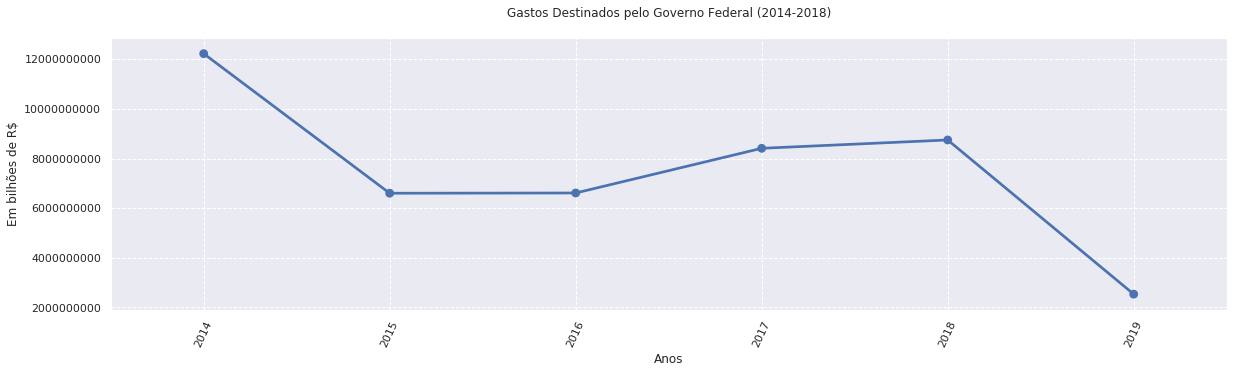

In [40]:
sns.set(rc={'figure.figsize':(20, 5)}) # fixa o tamanho
p = sns.pointplot(x='ano', y='valor_pago', data=gastos_anuais) # eixos e fonte de dados

plt.xticks(rotation=65) # rotação do eixo x
plt.ticklabel_format(style='plain', axis='y') # retira a menção da escala 
plt.grid(True, linestyle="--") # grid
plt.title("Gastos Destinados pelo Governo Federal (2014-2018)\n")
plt.xlabel("Anos")
plt.ylabel("Em bilhões de R$")
fig = p.get_figure() # salva gráfico como arquivo
fig.savefig("resultados/gastos_anuais.png") # salva gráfico como arquivo
plt.show()

## Despesas por órgão

In [22]:
df_despesa.groupby("orgao").valor_pago.sum().reset_index().sort_values("valor_pago", ascending=False)

,orgao,valor_pago
8,"Ministério da Ciência, Tecnologia, Inovações e...","13,409,524,687.09"
4,Conselho Nacional de Desenvolvimento Científic...,"9,996,929,536.13"
6,Fundo Nacional de Desenvolvimento Científico e...,"6,784,088,694.02"
5,Financiadora de Estudos e Projetos,"6,140,754,691.57"
3,Comissão Nacional de Energia Nuclear,"4,784,818,845.12"
1,Agêncial Nacional de Telecomunicações,"2,424,855,351.13"
7,Fundo para o Desenvolvimento Tecnológico das T...,"1,058,294,876.43"
2,Centro Nacional de Tecnologia Eletrônica Avanç...,"395,887,305.43"
0,Agência Espacial Brasileira,"141,878,739.07"
9,O Fundo de Universalização dos Serviços de Tel...,"278,133.80"


In [23]:
# Tabela dinâmica por ano e órgão

In [24]:
pd.pivot_table(df_despesa,index=["ano","orgao"], values=["valor_pago"], aggfunc=np.sum)

valor_pago
ano  orgao                                                              
2014 Agência Espacial Brasileira                           50,695,145.33
     Agêncial Nacional de Telecomunicações                420,621,054.22
     Centro Nacional de Tecnologia Eletrônica Avança...    86,183,296.56
     Comissão Nacional de Energia Nuclear                 840,630,408.69
     Conselho Nacional de Desenvolvimento Científico... 2,737,416,490.27
     Financiadora de Estudos e Projetos                 5,809,585,355.44
     Fundo Nacional de Desenvolvimento Científico e ...   546,332,259.55
     Fundo para o Desenvolvimento Tecnológico das Te...   178,308,198.67
     Ministério da Ciência, Tecnologia, Inovações e ... 1,557,710,671.60
2015 Agência Espacial Brasileira                           16,022,001.53
     Agêncial Nacional de Telecomunicações                415,990,247.73
     Centro Nacional de Tecnologia Eletrônica Avança...    72,736,343.52
     Comissão Nacional de Energia Nuclear                 875,045,111.23
     Conselho Nacional de Desenvolvimento Científico... 2,151,052,928.14
     Financiadora de Estudos e Projetos                    16,255,816.89
     Fundo Nacional de Desenvolvimento Científico e ... 1,352,735,189.25
     Fundo para o Desenvolvimento Tecnológico das Te...   224,372,956.35
     Ministério da Ciência, Tecnologia, Inovações e ... 1,477,754,679.34
     O Fundo de Universalização dos Serviços de Tele...         4,435.90
2016 Agência Espacial Brasileira                           20,774,542.80
     Agêncial Nacional de Telecomunicações                450,210,227.46
     Centro Nacional de Tecnologia Eletrônica Avança...    67,795,562.59
     Comissão Nacional de Energia Nuclear                 904,876,358.48
     Conselho Nacional de Desenvolvimento Científico... 1,509,921,494.28
     Financiadora de Estudos e Projetos                    33,695,768.19
     Fundo Nacional de Desenvolvimento Científico e ... 1,456,618,566.10
     Fundo para o Desenvolvimento Tecnológico das Te...   227,710,444.05
     Ministério da Ciência, Tecnologia, Inovações e ... 1,940,339,298.91
     O Fundo de Universalização dos Serviços de Tele...       101,419.00
2017 Agência Espacial Brasileira                           20,417,306.72
     Agêncial Nacional de Telecomunicações                476,183,560.15
     Centro Nacional de Tecnologia Eletrônica Avança...    74,365,277.23
     Comissão Nacional de Energia Nuclear                 931,413,729.82
     Conselho Nacional de Desenvolvimento Científico... 1,512,458,592.69
     Financiadora de Estudos e Projetos                   150,231,499.39
     Fundo Nacional de Desenvolvimento Científico e ... 1,539,531,036.89
     Fundo para o Desenvolvimento Tecnológico das Te...   220,099,963.58
     Ministério da Ciência, Tecnologia, Inovações e ... 3,488,184,848.37
     O Fundo de Universalização dos Serviços de Tele...       101,000.00
2018 Agência Espacial Brasileira                           24,919,725.41
     Agêncial Nacional de Telecomunicações                472,469,331.45
     Centro Nacional de Tecnologia Eletrônica Avança...    67,170,726.04
     Comissão Nacional de Energia Nuclear                 876,876,421.26
     Conselho Nacional de Desenvolvimento Científico... 1,450,095,567.56
     Financiadora de Estudos e Projetos                   130,692,896.39
     Fundo Nacional de Desenvolvimento Científico e ... 1,708,022,041.43
     Fundo para o Desenvolvimento Tecnológico das Te...   207,803,313.78
     Ministério da Ciência, Tecnologia, Inovações e ... 3,810,544,544.49
     O Fundo de Universalização dos Serviços de Tele...        61,281.00
2019 Agência Espacial Brasileira                            9,050,017.28
     Agêncial Nacional de Telecomunicações                189,380,930.12
     Centro Nacional de Tecnologia Eletrônica Avança...    27,636,099.49
     Comissão Nacional de Energia Nuclear                 355,976,815.64
     Conselho Nacional de Desenvolvimento Cient

## Recorte do CNPq

In [25]:
cnpq = df_despesa[(df_despesa['codigoOrgao'] == '20501')]

In [26]:
cnpq

,ano,codigoOrgao,codigoOrgaoSuperior,empenhado,liquidado,orgao,orgaoSuperior,pago,valor_pago
0,2014,20501,24000,"3.732.532.995,56","2.804.913.901,24",Conselho Nacional de Desenvolvimento Científic...,"Ministério da Ciência, Tecnologia, Inovações e...","2.737.416.490,27","2,737,416,490.27"
9,2015,20501,24000,"3.215.485.037,14","2.340.679.465,77",Conselho Nacional de Desenvolvimento Científic...,"Ministério da Ciência, Tecnologia, Inovações e...","2.151.052.928,14","2,151,052,928.14"
9,2016,20501,24000,"1.939.401.134,76","1.517.970.033,60",Conselho Nacional de Desenvolvimento Científic...,"Ministério da Ciência, Tecnologia, Inovações e...","1.509.921.494,28","1,509,921,494.28"
3,2017,20501,24000,"1.915.126.935,43","1.543.172.385,24",Conselho Nacional de Desenvolvimento Científic...,"Ministério da Ciência, Tecnologia, Inovações e...","1.512.458.592,69","1,512,458,592.69"
0,2018,20501,24000,"1.695.884.759,40","1.507.018.238,35",Conselho Nacional de Desenvolvimento Científic...,"Ministério da Ciência, Tecnologia, Inovações e...","1.450.095.567,56","1,450,095,567.56"
5,2019,20501,24000,"1.067.925.906,53","644.059.393,44",Conselho Nacional de Desenvolvimento Científic...,"Ministério da Ciência, Tecnologia, Inovações e...","635.984.463,19","635,984,463.19"


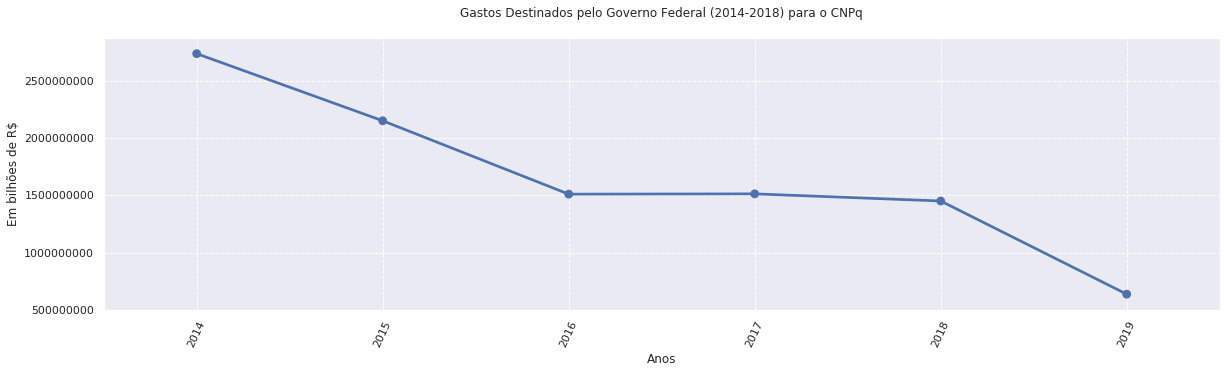

In [39]:
sns.set(rc={'figure.figsize':(20, 5)}) # fixa o tamanho
p = sns.pointplot(x='ano', y='valor_pago', data=cnpq)

plt.xticks(rotation=65)
plt.ticklabel_format(style='plain', axis='y') # retira a menção da escala 
plt.grid(True, linestyle="--")
plt.title("Gastos Destinados pelo Governo Federal (2014-2018) para o CNPq\n")
plt.xlabel("Anos")
plt.ylabel("Em bilhões de R$")
fig = p.get_figure() # salva gráfico como arquivo
fig.savefig("resultados/gastos_anuais_cnpq.png") # salva gráfico como arquivo
plt.show()

## Contratos do CNPq

In [28]:
# Documentação em: http://www.transparencia.gov.br/swagger-ui.html#/
# Procurar em Contratos do Poder Executivo Federal - contratos

In [30]:
# A consulta de contratos na API é de um mês por vez

In [32]:
# Então faço uma iteração de meses dentro da iteração principal dos anos

In [30]:
dia_inicial = '01'
dia_final = '31'
codigoOrgao = '20501'

In [42]:
for vez in range(2014, 2020):
    ano = str(vez)
    print(ano)
    
    for num in range(1, 13): # Iteração pelos 12 meses
        if num <= 9:
            mes = '0' + str(num)
        else:
            mes = str(num)
    
        url = f'http://www.portaldatransparencia.gov.br/api-de-dados/contratos?dataInicial={dia_inicial}%2F{mes}%2F{ano}&dataFinal={dia_final}%2F{mes}%2F{ano}&codigoOrgao={codigoOrgao}&pagina=1'
    
        try: 
            r = requests.get(url)
        except requests.exceptions.HTTPError as errh:
            print ("Http Error:",errh)
        except requests.exceptions.ConnectionError as errc:
            print ("Error Connecting:",errc)
        except requests.exceptions.Timeout as errt:
            print ("Timeout Error:",errt)
        except requests.exceptions.RequestException as err:
            print ("OOps: Something Else",err)
        
        contratos = r.json()
    
        df_parcial = pd.DataFrame(contratos)
    
        if vez == 2014 and num == 1:
            raw_df = df_parcial
        elif num > 1:
            raw_df = raw_df.append(df_parcial)

2014
2015
2016
2017
2018
2019


In [43]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 0
Data columns (total 14 columns):
contrato                 114 non-null object
dataAssinatura           114 non-null object
dataFimVigencia          3 non-null object
dataInicioVigencia       114 non-null object
dataPublicacaoDOU        114 non-null object
dimCompra                114 non-null object
fornecedor               114 non-null object
id                       114 non-null int64
modalidadeCompra         0 non-null object
situacaoContrato         0 non-null object
unidadeGestora           114 non-null object
unidadeGestoraCompras    0 non-null object
valorFinalCompra         114 non-null float64
valorInicialCompra       114 non-null float64
dtypes: float64(2), int64(1), object(11)
memory usage: 13.4+ KB


In [35]:
raw_df.reset_index().head()

,index,contrato,dataAssinatura,dataFimVigencia,dataInicioVigencia,dataPublicacaoDOU,dimCompra,fornecedor,id,modalidadeCompra,situacaoContrato,unidadeGestora,unidadeGestoraCompras,valorFinalCompra,valorInicialCompra
0,0,"{'numero': '2592016', 'objeto': 'Objeto: Contr...",08/01/2017,None,08/01/2017,03/02/2017,"{'numero': '000012017', 'objeto': 'Objeto: Con...","{'numeroInscricaoSocial': '', 'nome': 'CEB DIS...",22309488,None,None,"{'codigo': '364102', 'nome': 'CONSELHO NAC DE ...",None,"3,525,961.44","1,683,822.00"
1,1,"{'numero': '442014', 'objeto': 'Objeto: Presta...",17/03/2014,None,17/03/2014,29/04/2014,"{'numero': '000072014', 'objeto': 'Objeto: Con...","{'numeroInscricaoSocial': '', 'nome': 'COMPANH...",26203371,None,None,"{'codigo': '364102', 'nome': 'CONSELHO NAC DE ...",None,"186,451.20","186,451.20"
2,2,"{'numero': '2372015', 'objeto': 'Objeto: Forne...",08/01/2016,None,08/01/2016,10/02/2016,"{'numero': '000012016', 'objeto': 'Objeto: Con...","{'numeroInscricaoSocial': '', 'nome': 'CEB DIS...",27008010,None,None,"{'codigo': '364102', 'nome': 'CONSELHO NAC DE ...",None,"3,299,267.76","1,649,633.88"
3,3,"{'numero': '182018', 'objeto': 'Objeto: Presta...",18/07/2018,None,18/07/2018,23/08/2018,"{'numero': '000052018', 'objeto': 'Objeto: Con...","{'numeroInscricaoSocial': '', 'nome': 'COMPANH...",28210335,None,None,"{'codigo': '364102', 'nome': 'CONSELHO NAC DE ...",None,"1,795.20","1,795.20"
4,0,"{'numero': '2592016', 'objeto': 'Objeto: Contr...",08/01/2017,None,08/01/2017,03/02/2017,"{'numero': '000012017', 'objeto': 'Objeto: Con...","{'numeroInscricaoSocial': '', 'nome': 'CEB DIS...",22309488,None,None,"{'codigo': '364102', 'nome': 'CONSELHO NAC DE ...",None,"3,525,961.44","1,683,822.00"


In [36]:
# groupby pelo id do contrato

In [37]:
raw_df.groupby('id').valorFinalCompra.sum().reset_index().sort_values("valorFinalCompra", ascending=False)

,id,valorFinalCompra
1,22309488,"119,882,688.96"
5,27008010,"75,883,158.48"
4,26203371,"559,353.60"
6,28210335,"91,555.20"
2,24706252,"1,160.00"
0,21607089,398.00
3,25306633,44.00


In [44]:
raw_df.to_excel('resultados/contratos_cnpq.xlsx',sheet_name='Sheet1')

### Mas não é correto somar o mesmo id porque se repete se o contrato está em vigor - então elimina duplicados

In [45]:
raw_df = raw_df.drop_duplicates(['id'], keep='last')

In [46]:
raw_df.groupby('id').valorFinalCompra.sum().reset_index().sort_values("valorFinalCompra", ascending=False)

,id,valorFinalCompra
1,22309488,"3,525,961.44"
5,27008010,"3,299,267.76"
4,26203371,"186,451.20"
6,28210335,"1,795.20"
2,24706252,"1,160.00"
0,21607089,398.00
3,25306633,44.00


In [ ]:
# Na data que escrevi este curso

In [47]:
contrato_mais_caro = raw_df[(raw_df['id'] == 22309488)]

In [48]:
contrato_mais_caro

,contrato,dataAssinatura,dataFimVigencia,dataInicioVigencia,dataPublicacaoDOU,dimCompra,fornecedor,id,modalidadeCompra,situacaoContrato,unidadeGestora,unidadeGestoraCompras,valorFinalCompra,valorInicialCompra
0,"{'numero': '2592016', 'objeto': 'Objeto: Contr...",08/01/2017,None,08/01/2017,03/02/2017,"{'numero': '000012017', 'objeto': 'Objeto: Con...","{'numeroInscricaoSocial': '', 'nome': 'CEB DIS...",22309488,None,None,"{'codigo': '364102', 'nome': 'CONSELHO NAC DE ...",None,"3,525,961.44","1,683,822.00"


In [49]:
contrato_mais_caro[['dimCompra', 'fornecedor', 'unidadeGestora']].head().to_dict()

{'dimCompra': {0: {'numero': '000012017',
   'objeto': 'Objeto: Contratação de empresa especializada na prestação de forma continuada do  serviço público de distribuição de energia elétrica, nos termos do Contrato de Concessão nº 66/1999, celebrado entre a União Federal, por intermédio da Agência Nacional de Energia Elétrica (ANEEL), e a CEB, necessário as funções do Edifício Sede do CNPq, localizado no SHIS QI 1 conjunto B   Lago Sul, Brasília /DF.',
   'numeroProcesso': '001165/2016-0',
   'contatoResponsavel': 'CLAUDIO DA SILVA LIMA'}},
 'fornecedor': {0: {'numeroInscricaoSocial': '',
   'nome': 'CEB DISTRIBUICAO S.A.',
   'razaoSocialReceita': 'CEB DISTRIBUICAO S.A.',
   'nomeFantasiaReceita': 'CEB DISTRIBUICAO S.A.',
   'cnae': None,
   'municipio': None,
   'localidadePessoa': None,
   'naturezaJuridica': None,
   'dataAbertura': '26/07/2005',
   'enderecoEletronico': 'marly@ceb.com.br',
   'numeroTelefone': '61  33631894 61  33634013',
   'descricaoLogradouro': 'ST SETOR DE INDU

In [50]:
raw_df.to_excel('resultados/contratos_cnpq.xlsx',sheet_name='Sheet1')